## 1. Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

## 2. Read Data

In [3]:
# Load the data
df = pd.read_csv('exercise_tracking.csv')
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [4]:
# Check for class imbalance of predictor field
df['Gender'].value_counts()

Gender
Male      511
Female    462
Name: count, dtype: int64

## 3. Prep Data for Modeling

In [8]:
# Split the data based on the fetal_health field
X = df.drop(columns=['Gender']) 
y = df['Gender'] 

In [10]:
X.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [12]:
y

0        Male
1      Female
2      Female
3        Male
4        Male
        ...  
968      Male
969      Male
970    Female
971      Male
972      Male
Name: Gender, Length: 973, dtype: object

In [14]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the gender column
X['Workout_Type'] = label_encoder.fit_transform(X['Workout_Type'])

In [16]:
# Confirm encoding for Gender column
X.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,88.3,1.71,180,157,60,1.69,1313.0,3,12.6,3.5,4,3,30.20
1,46,74.9,1.53,179,151,66,1.30,883.0,1,33.9,2.1,4,2,32.00
2,32,68.1,1.66,167,122,54,1.11,677.0,0,33.4,2.3,4,2,24.71
3,25,53.2,1.70,190,164,56,0.59,532.0,2,28.8,2.1,3,1,18.41
4,38,46.1,1.79,188,158,68,0.64,556.0,2,29.2,2.8,3,1,14.39


In [20]:
# Use an 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Fit the scaler on the training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test set
X_test_scaled = scaler.transform(X_test)

# Print the training set
X_train_scaled

array([[ 0.34061343, -0.86811194,  0.78541798, ..., -0.30058878,
        -1.05024435, -1.23091698],
       [ 0.58990529, -0.88679832, -0.00467148, ..., -0.30058878,
         0.30031781, -0.95416993],
       [ 1.67017003,  0.53336638, -0.39971621, ...,  1.87483514,
         1.65087996,  0.83724646],
       ...,
       [ 1.50397546,  0.37920377, -0.24169832, ...,  0.78712318,
         0.30031781,  0.55752364],
       [ 0.00822428, -0.62986063, -0.5577341 , ..., -0.30058878,
        -1.05024435, -0.41257893],
       [ 0.25751614, -0.4850412 ,  2.04956113, ..., -1.38830074,
        -1.05024435, -1.30679924]])

## 4. Train Model

In [22]:
# Initialize the Random Forest Regressor
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the scaled training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

## 5. Evalaute Model Performance

In [24]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of Random Forest Classifier: {accuracy:.2f}')

Accuracy of Random Forest Classifier: 0.98


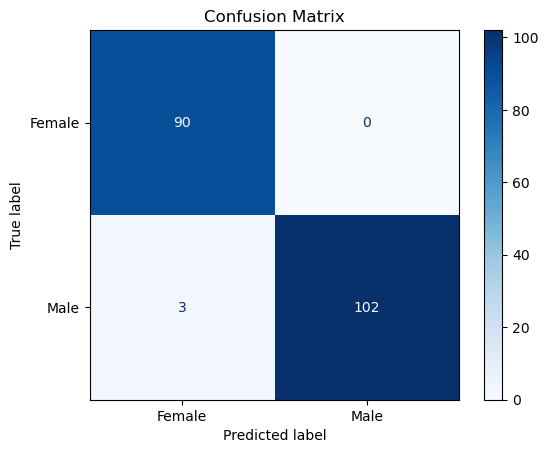

In [26]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## 6. Model Feature Importance

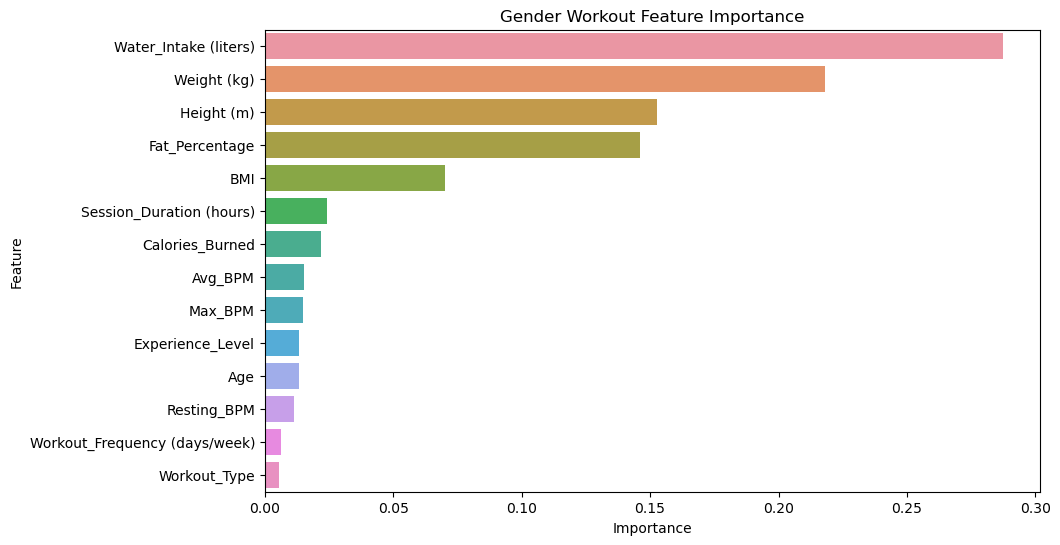

In [31]:
# Get feature importance from the model
feature_importance = rf_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Gender Workout Feature Importance')
plt.show()

### Remarks
#### Random Forest Classification is an effective model for predicting gender using exercise related data. The rf model achieved an accuracy of 98% indicating that the model can effectively predict gender for 98% of the test set. Key features such as water intake, weight, and height were identified as strong predictors of gender.